### DataFrame Methods

In [1]:
import pandas as pd 
import numpy as np

#### value_counts

In [2]:
# value_counts(series and dataframe)
marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks','package'])
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [3]:
# Find which player has won most POTM -> in finals and qualifiers
ipl = pd.read_csv('ipl-matches.csv')
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts().head(7)

Player_of_Match
KA Pollard      3
F du Plessis    3
SK Raina        3
A Kumble        2
MK Pandey       2
YK Pathan       2
M Vijay         2
Name: count, dtype: int64

<Axes: ylabel='count'>

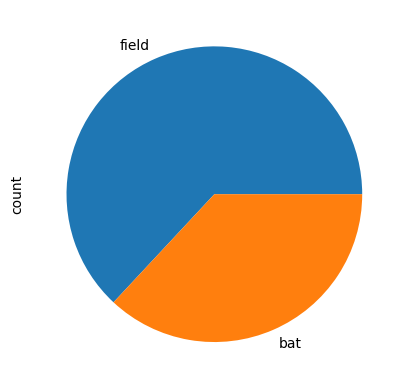

In [4]:
# Toss decision plot
ipl['TossDecision'].value_counts().plot(kind='pie')

In [5]:
# How many matches each team has played
(ipl['Team1'].value_counts()+ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

#### sort_values

In [6]:
# sort_values(series and dataframe) -> ascending -> na_position -> inplace -> multiple cols
movies = pd.read_csv('movies.csv')
movies.sort_values('title_x',ascending=False).iloc[:,[5,7]]

,original_title,year_of_release
1623,Zubeidaa,2001
939,Zor Lagaa Ke... Haiya!,2009
756,Zokkomon,2011
670,Zindagi Tere Naam,2012
778,Zindagi Na Milegi Dobara,2011
...,...,...
1039,1971,2007
723,1920: Evil Returns,2012
287,1920 London,2016
1021,1920,2008


In [7]:
movies.sort_values(['year_of_release','title_x'],ascending=[True,False]).iloc[:,[5,7]]

,original_title,year_of_release
1623,Zubeidaa,2001
1625,Yeh Zindagi Ka Safar,2001
1622,Yeh Teraa Ghar Yeh Meraa Ghar,2001
1620,Yeh Raaste Hain Pyaar Ke,2001
1573,Yaadein...,2001
...,...,...
37,Article 15,2019
46,Arjun Patiala,2019
10,Amavas,2019
26,Albert Pinto Ko Gussa Kyun Aata Hai?,2019


#### Rank(series)

In [8]:
batsman = pd.read_csv('batsman_runs_ipl.csv')
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)
batsman.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


#### sort_index(series and dataframe)

In [9]:
movies.sort_index(ascending=False).iloc[0:,5:9]

,original_title,is_adult,year_of_release,runtime
1628,Humsafar,0,2011,35
1627,Daaka,0,2019,136
1626,Sabse Bada Sukh,0,2018,\N
1625,Yeh Zindagi Ka Safar,0,2001,146
1624,Tera Mera Saath Rahen,0,2001,148
...,...,...,...,...
4,Evening Shadows,0,2018,102
3,Why Cheat India,0,2019,121
2,The Accidental Prime Minister,0,2019,112
1,Battalion 609,0,2019,131


#### set_index(dataframe) -> inplace

In [10]:
batsman.set_index('batter').sort_values('batting_rank')

,batsman_run,batting_rank
batter,,
V Kohli,6634,1.0
S Dhawan,6244,2.0
DA Warner,5883,3.0
RG Sharma,5881,4.0
SK Raina,5536,5.0
...,...,...
SS Cottrell,0,594.0
S Kaushik,0,594.0
IC Pandey,0,594.0


#### how to replace existing index without loosing

In [11]:
batsman.reset_index().set_index('batting_rank').sort_values('batting_rank').iloc[:,[1,2]]

,batter,batsman_run
batting_rank,,
1.0,V Kohli,6634
2.0,S Dhawan,6244
3.0,DA Warner,5883
4.0,RG Sharma,5881
5.0,SK Raina,5536
...,...,...
594.0,SS Cottrell,0
594.0,S Kaushik,0
594.0,IC Pandey,0


#### rename(dataframe) -> index
- Applicable only for DataFrames

In [12]:
movies.rename(index={'Uri: The Surgical Strike':'Uri','Battalion 609':'Battalion'})

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


#### unique(series)

In [13]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
print(temp)
temp.nunique()

0     1.0
1     1.0
2     2.0
3     2.0
4     3.0
5     3.0
6     4.0
7     4.0
8     5.0
9     5.0
10    NaN
11    NaN
dtype: float64


5

#### Handling missing values

In [14]:
students = pd.DataFrame(
    {
        'name':['Abhay','Rohit','Ayush',np.nan,'Shivansh',np.nan,'Rishabh',np.nan,'Ansh',np.nan],
        'college':['MNNIT','IET','NITD',np.nan,np.nan,'MMMUT','MANIT',np.nan,np.nan,'RECM'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)
students

,name,college,branch,cgpa,package
0,Abhay,MNNIT,eee,6.66,4.0
1,Rohit,IET,it,8.25,5.0
2,Ayush,NITD,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Shivansh,NaN,me,5.60,6.0
5,NaN,MMMUT,ce,9.00,7.0
6,Rishabh,MANIT,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,Ansh,NaN,bio,7.40,NaN
9,NaN,RECM,NaN,NaN,NaN


In [15]:
students.dropna(how='all')

,name,college,branch,cgpa,package
0,Abhay,MNNIT,eee,6.66,4.0
1,Rohit,IET,it,8.25,5.0
2,Ayush,NITD,cse,6.41,6.0
4,Shivansh,NaN,me,5.60,6.0
5,NaN,MMMUT,ce,9.00,7.0
6,Rishabh,MANIT,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,Ansh,NaN,bio,7.40,NaN
9,NaN,RECM,NaN,NaN,NaN


In [16]:
# fillna(series + dataframe)
students['name'].fillna('unknown')

0       Abhay
1       Rohit
2       Ayush
3     unknown
4    Shivansh
5     unknown
6     Rishabh
7     unknown
8        Ansh
9     unknown
Name: name, dtype: object

In [17]:
students.dropna(subset=['name','college'])

,name,college,branch,cgpa,package
0,Abhay,MNNIT,eee,6.66,4.0
1,Rohit,IET,it,8.25,5.0
2,Ayush,NITD,cse,6.41,6.0
6,Rishabh,MANIT,civ,7.40,8.0


#### Find the last match played by Virat Kohli in Delhi

In [18]:
ipl['all_players']=ipl['Team1Players']+ipl['Team2Players']
ipl['all_players']

0      ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...
1      ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...
2      ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...
3      ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...
4      ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...
                             ...                        
945    ['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...
946    ['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...
947    ['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...
948    ['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...
949    ['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...
Name: all_players, Length: 950, dtype: object

In [19]:
def kohli_played(players_list):
    return 'V Kohli' in players_list   

In [20]:
ipl['kohli_played']=ipl['all_players'].apply(kohli_played)
ipl[(ipl['City']=='Delhi')&(ipl['kohli_played']==True)].drop_duplicates(subset=['City','kohli_played'])

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,kohli_played
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True
